# Exercise 1.2: Graphical Solutions to Transcendental Equations

One of the most standard problems in quantum mechanics is to find the bound states of a particle of mass $m$ in a one-dimensional *finite* square well, with potential:

$$
V(x)=
\begin{cases}
-V_0& \quad \text{if $-a \leq x \leq a$;}\\ 
0& \quad \text{if $|x| > a$.}\\ 
\end{cases}
$$

After solving the Schrödinger equation in one dimension and applying the boundary conditions, we obtain transcendental equations for the energies, one type for odd and one type for even wave functions. Using the definitions:

$$
z_0 = \frac{a}{\hbar} \sqrt{2 m V_0}\;,
$$
which characterizes the "depth" of the well, and:

$$
z = a\frac{\sqrt{2m (E+V_0)}}{\hbar}\;,
$$
then the two *transcendental* equations can be written as:

$$
\tan(z) = \sqrt{ \frac{z_0^2}{z^2} - 1}~~~~\text{(even wave functions)}
$$

$$
-\cot(z) = \sqrt{ \frac{z_0^2}{z^2} - 1}~~~~\text{(odd wave functions)}
$$

[see e.g. Griffiths & Schroeter, Introduction to Quantum Mechanics, Chapter 2]

Use matplotlib to plot the two transcendental equations for $z_0 = 1, 8, 16$, i.e. plotting the left and right hand-sides of the equations. Their points of intersection give the values of $z$ that correspond to solutions that can be used to extract the energy $E$. [We will later see how to find the points numerically.]

**10% Bonus:**

Change the $z$-axis labels and ticks to correspond to $\pi/2, \pi, 3\pi/2, 2\pi, 5\pi/2,...$.

# Solution to Exercise 2:

We will use matplotlib to plot the necessary functions. We create NumPy arrays for the variable z, appropriate for each function (we apply a "trick" to get rid of the singularities of the tangent and cotangent), and then use Python's list comprehension to calculate the functions. 

We plot the relevant functions, varying the values of $z_0$, and replace the values on the $z$ axis with appropriate ones for the tangent and cotangent. 

/var/folders/1k/t4_gv3r962999ltp29cmwdt40000gq/T/ipykernel_58329/2117477358.py:20: RuntimeWarning: invalid value encountered in sqrt
  R = [np.sqrt(z0**2/z**2 - 1) for z0 in z0_list] # use list comprehension to create the three different R's. Note that this will complain since the square root becomes negative at some point!


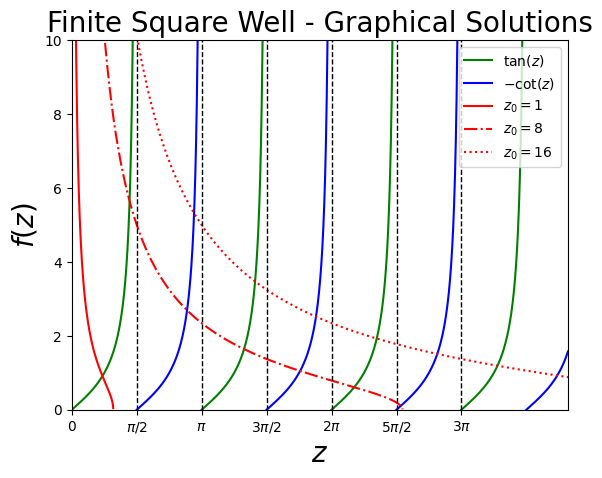

In [90]:
import matplotlib.pyplot as plt # import matplotlib, a conventional module name is plt
import numpy as np
import math
from math import pi

# numpy array for even wave functions: i.e. tan(z), remove the points where tan(z) diverges
ze = np.linspace(0.01, 9*math.pi/2, 10000)
ze[np.abs(np.cos(ze)) <= np.abs(np.sin(ze[1]-ze[0]))] = np.nan # remove points where tan(z) diverges
# the even functions:
LE = np.tan(ze) # left-hand side of even equation

# numpy array for odd wave functions: i.e. -cot(z), remove the points where -cot(z) diverges
zo = np.linspace(0.01, 9*math.pi/2, 10000)
zo[np.abs(np.sin(zo)) <= np.abs(np.sin(zo[1]-zo[0]))] = np.nan # remove points where -cot(z) diverges
LO = -1/np.tan(zo) # left-hand side of odd equation 
    
# create a list of z_0's:
z0_list = [1, 8, 16]
z = np.linspace(0.01, 9*math.pi/2, 10000)
R = [np.sqrt(z0**2/z**2 - 1) for z0 in z0_list] # use list comprehension to create the three different R's. Note that this will complain since the square root becomes negative at some point!

fig, ax = plt.subplots() # create the elements required for matplotlib. 

# set the labels and titles:
ax.set_xlabel(r'$z$', fontsize=20) # set the x label
ax.set_ylabel(r'$f(z)$', fontsize=20) # set the y label
ax.set_title('Finite Square Well - Graphical Solutions', fontsize=20) # set the title 

# make one-dimensional plots using the above arrays
# plot tan(z) and -cot(z):
ax.plot(ze, LE, color='green', linestyle='-', label=r'$\tan(z)$') 
ax.plot(zo, LO, color='blue', linestyle='-', label=r'$-\cot(z)$') 

# plot the right-hand side of the equation for the three different values of z_0  
ax.plot(z, R[0], color='red', linestyle='-', label=r'$z_0=1$') 
ax.plot(z, R[1], color='red', linestyle='-.', label=r'$z_0=8$') 
ax.plot(z, R[2], color='red', linestyle=':', label=r'$z_0=16$') 

# plot vertical lines at pi/2, pi, 3pi/2, 2pi, 5pi/2, 3pi
ax.vlines(x=math.pi/2, ymin=0, ymax=15, linewidth=1, ls='--', color='black')
ax.vlines(x=math.pi, ymin=0, ymax=15, linewidth=1, ls='--', color='black')
ax.vlines(x=3*math.pi/2, ymin=0, ymax=15, linewidth=1, ls='--', color='black')
ax.vlines(x=2*math.pi, ymin=0, ymax=15, linewidth=1, ls='--', color='black')
ax.vlines(x=2.5*math.pi, ymin=0, ymax=15, linewidth=1, ls='--', color='black')
ax.vlines(x=3.0*math.pi, ymin=0, ymax=15, linewidth=1, ls='--', color='black')

# change the axis labels to correspond to [0, pi/2, pi, 1.5 * pi, 2*pi, 2.5*pi, 3*pi]
ax.set_xticks([0, pi/2, pi, 1.5 * pi, 2*pi, 2.5*pi, 3*pi])
ax.set_xticklabels(['0', '$\\pi/2$', '$\\pi$', '$3\\pi/2$', '$2\\pi$', '$5\\pi/2$', '$3\\pi$'])

# set the x and y limits:
ax.set_xlim(0, 12)
ax.set_ylim(0,10)

# construct the legend:
ax.legend(loc='upper right')  # Add a legend

plt.show() # show the plot here